In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

The purpose of logistic regression is classification and in particular between two possible choices (binary classification). We are therefore trying to predict y where $y \in \{0,1\}$ from our input data X and weights $\theta$ which we will calculate. For this we use the logistic (or sigmoid) function which gives values between 0 and 1.
$$ g(z) = \frac{1}{1+e^{-z}}$$

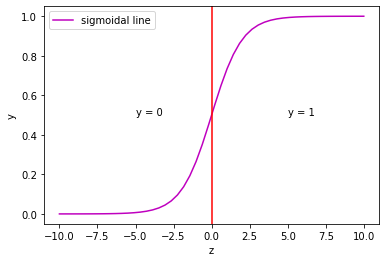

In [2]:
z = np.linspace(-10, 10)

def sigmoid(z):
    y = []
    for val in z:
        y.append(1/(1+np.exp(-val)))
    return y

plt.plot(z, sigmoid(z), c='m', label='sigmoidal line')
plt.axvline(x=0, c='r')
plt.legend()
plt.ylabel('y')
plt.xlabel('z')
plt.annotate('y = 1', (5,0.5))
plt.annotate('y = 0', (-5,0.5))
plt.show()

This function gives us a probability of y being equal to 0 or 1 for each value of z and we can make a decision on the boundary at which we assume the value to be 0 or 1. In this case $y=0.5$ (our decision boundary) when $x=0$ so we take $y=1$ when $x\geq 0$ and $y=0$ when $x < 0$. In this simple case we can take x as a single feature which is not scaled by any weight, upon which we are making our predictions but there can be a range of features and we want to fit our model. We therefore replace z in the above equation with $h(x)$ 
$$h(x) = 1\theta_{0} + x_{1}\theta_{1} + x_{2}\theta_{2} \cdots$$
where $h(x)$ is our hypothesis. $\theta_{0}$ is our bias and $x_{1}, x_{2}$ etc are our features and can take any polynomial form. We can therefore rewite our hypothesis as a matrix operation
$$
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{i}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \cdots & x_{i,n} \\
\end{bmatrix}
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\vdots \\
\theta_{n}
\end{bmatrix}
$$
where n is our number of features and i is our number of instances. We can then rewrite our logistic function as
$$ g(z) = \frac{1}{1+e^{-\theta^{T}X}}$$

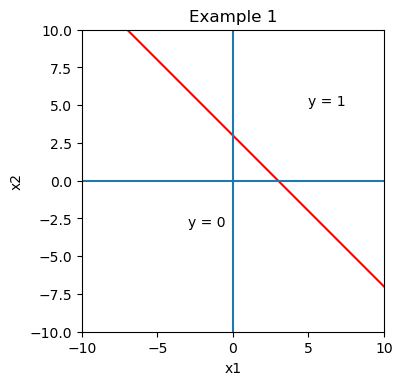

In [3]:
x1 = np.linspace(-10,10)

fig, ax = plt.subplots(dpi=100)
ax = plt.plot(x1, (-x1 + 3), c='r')
plt.gca().set_aspect('equal')
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Example 1')
plt.annotate('y = 1', (5,5))
plt.annotate('y = 0', (-3,-3))
plt.show()

In 2d space (two features) we can show how the decision boundary can be changed depending on the parameters for $\theta$. We just have to remember that $z \equiv h(x) \equiv \theta^{T}X$ so that
$$\theta^{T}X \geq 0 \Rightarrow y = 1$$
$$\theta^{T}X < 0 \Rightarrow y = 0$$

### Example 1
Given a hypothesis of $h(x) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}$ and parameters of $[-3, 1, 1]$ for $\theta_{i}$ we can rearange our hypothesis to give
$$y = 1 \Rightarrow -3 + x_{1} + x_{2} \geq 0$$
$$y = 1 \Rightarrow x_{1} + x_{2} \geq 3$$
which we have drawn above

### Example 2
We can also create more complicated decision boundaries using polynomial terms. If we take our hypothesis as 
$$h(x) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}+ \theta_{3}X_{1}^{2} + \theta_{4}X_{2}^{2}$$
and our values of theta as $[-1, 0, 0, 1, 1]$ we get the boundary condition as
$$y = 1 \Rightarrow x_{1}^{2} + x_{2}^{2} \geq 1$$
We can then plot this as 

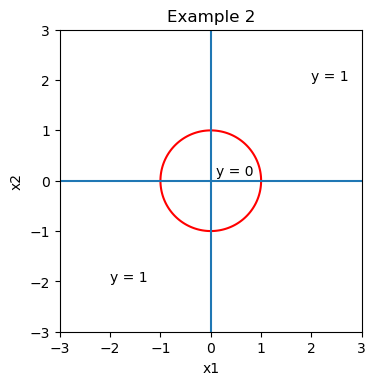

In [4]:
x1 = np.linspace(-1.0, 1.0, 100)
x2 = np.linspace(-1.0, 1.0, 100)
ax1, ax2 = np.meshgrid(x1,x2)

fig, ax = plt.subplots(dpi=100)
F2 = ax1**2 + ax2**2 - 1
ax = plt.contour(ax1,ax2,F2,[0], colors = 'r')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.annotate('y = 1', (2,2))
plt.annotate('y = 1', (-2,-2))
plt.annotate('y = 0', (0.1,0.1))
plt.axvline(x=0)
plt.axhline(y=0)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Example 2')
plt.show()

In order to obtain values for our parameters $\theta$ we need to train our model. Which means we need many examples, with data for our x-values and for each an answer for y (either 0 or 1). We then guess some parameters and see how well our model did at predicting the y-values. Our predicted values will not be 0 or 1 but will be between these depending on where they fall on the sigmoidal curve. A good model will accurately predict samples (or instances) on the correct side of the decision boundary. But we need a way to quantify this in order to improve upon our model. For this we use a cost function and we will now see what a simple cost function might look like.

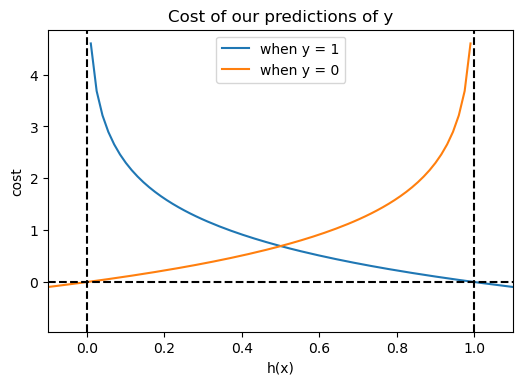

In [5]:
theta = np.linspace(-1, 2, 200)

fig, ax = plt.subplots(dpi=100)
ax = plt.plot(theta, (-np.log(theta)), label='when y = 1')
ax = plt.plot(theta, (-np.log(1-theta)), label='when y = 0')
plt.xlim(-0.1, 1.1)
plt.axvline(x=0, linestyle="dashed", c='k')
plt.axvline(x=1,linestyle="dashed", c='k')
plt.axhline(y=0,linestyle="dashed", c='k')
plt.legend()
plt.xlabel('h(x)')
plt.ylabel('cost')
plt.title('Cost of our predictions of y')
plt.show()

When our target for y is 1, we use the blue line
$$cost = -log{(h(x))}$$
and when our target for y is 0, we use the orange line
$$cost = -log{(1-h(x))}$$
Our $y=1$ cost function gives us a cost of 0 when we perfectly predict 1 (can't happen due to the sigmoidal curve) and a rapidly increasing cost as our prediction is further from 0. Our $y=0$ cost function is the same in reverse, giving a cost of 0 when we predict 0. We can see that the better our predictions are, or the closer they are to the actual values, the lower our cost will be.

We can reduce these cost functions to one function as 
$$\big [-y\log{(h_{\theta}(x)}-(1-y)\log{(1-x)}\big ]$$
To get the cost of many samples we sum over each sample and normalise
$$J(\theta) = -\frac{1}{m}\sum^{m}_{i=1}\big [y^{(i)}\log{(h_{\theta}(x^{(i)})}+(1-y^{(i)})\log{(1-x^{(i)})}\big ]$$
where J is our overall cost and m is our number of samples

We will demonstrate this with a very simple hypothesis
$$h(x) = \theta_{0} + \theta_{1} x$$

   bias  feat1  y-value  hypothesis      cost
0     1      2        1    0.750260  0.287335
1     1      4        0    0.817574  1.701413
2     1     -2        1    0.574443  0.554355
3     1      1        1    0.710950  0.341154
4     1      7        0    0.890903  2.215520
Our overall cost for this set of parameters is -  1.0199554490957106 




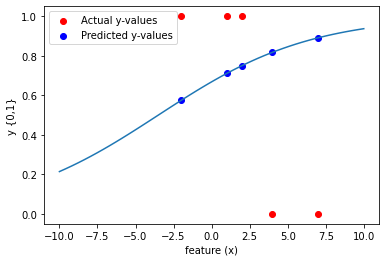

   bias  feat1  y-value  fake hypothesis  fake cost
0     1      2        0              0.1   0.105361
1     1      4        0              0.1   0.105361
2     1     -2        1              0.9   0.105361
3     1      1        0              0.1   0.105361
4     1      7        1              0.9   0.105361
Our overall cost for our fake hypothesis (hypothesis = y) -  0.1053605156578263


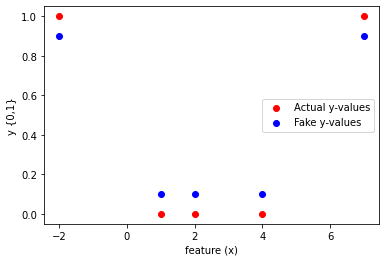

In [6]:
# Number of examples
instances = 5
# Our initial guess of the weight for the feature
weight = 0.2
# Our inital guess for the bias
bias = 0.7

df_cost = pd.DataFrame()
# Our bias should always be 1 so we add the bias in each instance
df_cost['bias'] = [1] * 5
# creating random input features
df_cost['feat1'] = np.random.randint(-9,10,instances)
# creating random values of y (either 0 or 1)
df_cost['y-value'] = np.random.randint(0,2,instances)
# Calculating our hypothesis based on our feature, weight and bias
df_cost['hypothesis'] = 1/(1+np.exp(-(bias*df_cost['bias'] + weight*df_cost['feat1'])))
# Calculated the cost (or how well we predicted the actual values of y)
df_cost['cost'] = -(df_cost['y-value'] * np.log(df_cost['hypothesis']))\
    - ((1-df_cost['y-value']) * (np.log(1-df_cost['hypothesis'])))

print(df_cost)
print('Our overall cost for this set of parameters is - ', np.sum(df_cost['cost'].values)/instances, '\n\n')

def weighted_sigmoid(z, w, b):
    y = []
    for val in z:
        y.append(1/(1+np.exp(-(w*val+b))))
    return y

z = np.linspace(-10, 10)
plt.plot(z, weighted_sigmoid(z, weight, bias))
plt.scatter(df_cost['feat1'].values, df_cost['y-value'].values, c='r', label='Actual y-values')
plt.scatter(df_cost['feat1'].values, df_cost['hypothesis'].values, c='b', label='Predicted y-values')
plt.legend()
plt.xlabel('feature (x)')
plt.ylabel('y {0,1}')
plt.show()

# creating a new df to start again and show how close values of h(x) give low cost
df_cost2 = df_cost.drop(['hypothesis', 'cost', 'y-value'], axis =1)
# Creating values of y which we will aim towards
df_cost2['y-value'] = [0,0,1,0,1]
# Creating fake values, very close to the y-values (log(0) is undefined so won't use 0)
df_cost2['fake hypothesis'] = [0.1, 0.1, 0.9, 0.1, 0.9]
# calculating the cost for our fake values of hypothesis
df_cost2['fake cost'] = -(df_cost2['y-value'] * np.log(df_cost2['fake hypothesis']))\
    - ((1-df_cost2['y-value']) * (np.log(1-df_cost2['fake hypothesis'])))
print(df_cost2)
print('Our overall cost for our fake hypothesis (hypothesis = y) - ',
      np.sum(df_cost2['fake cost'].values)/instances)

plt.scatter(df_cost2['feat1'].values, df_cost2['y-value'].values, c='r', label='Actual y-values')
plt.scatter(df_cost2['feat1'].values, df_cost2['fake hypothesis'].values, c='b', label='Fake y-values')
plt.legend()
plt.xlabel('feature (x)')
plt.ylabel('y {0,1}')
plt.show()

If the fit of the model is perfect, $h_{\theta}(x)$ will be the same as $y$ and so $J(\theta)$ (the cost) will be $0$. Any deviation from this perfect fit will increase the cost as the difference between the calculated and actual y value is squared. Therefore the best set of parameters will give us the minimum point of the cost function, where the derivative is 0 

We take the partial derivative of the cost function with respect to each parameter at a time.
$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}$$ 
$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}x$$
and use this to determine how to change the parameter in order to decrease the cost. If the gradient is negative, the parameter needs to be increased and vice versa. This is done in a stepwise manner, taking the derivatives with a set of values for the parameters, changing each one and repeating the process 

$$\theta_{0}' = \theta_{0} - \alpha \frac{\partial J}{\partial \theta_{0}}$$
$$\theta_{1}' = \theta_{1} - \alpha \frac{\partial J}{\partial \theta_{1}}$$

We scale this by the optimization parameter $\alpha$ to control the descent of the cost function.

In [7]:
instances = 50

df_grad = pd.DataFrame()
df_grad['bias'] = [1] * 50
df_grad['feat'] = np.random.randint(-5,5,instances)
# Creating our y values. These all belong to {0, 1} and represent two differnt categories
df_grad['y-value'] = np.nan
# In this case
df_grad.loc[df_grad['feat'] <= 2, 'y-value'] = 0
df_grad.loc[df_grad['feat'] > 2, 'y-value'] = 1
print(df_grad.head())

   bias  feat  y-value
0     1    -2      0.0
1     1    -4      0.0
2     1     2      0.0
3     1    -1      0.0
4     1    -4      0.0


Here we have chosen y-values to be 0 when our feature is below 2 and to be 1 when our feature is above 2. This gives a simple relationship between the feature and the value that we can find with our gradient decent.

In [8]:
def log_func(X, th0, th1):
    return 1/(1+np.exp(-(th0 + th1*X)))

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (-1/mm) * np.sum((y * np.log(log_func(X, th0, th1))) + ((1-y) * (np.log(1-log_func(X, th0, th1)))))

def pderiv_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum(log_func(X, th0, th1) - y)

def pderiv_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum((log_func(X, th0, th1) - y)*X)

We have calculated the partial derivatives of the log function for $\theta_{0}$ and $\theta_{1}$. These will be used to alter our parameters on each cycle of gradient descent.

Original parameters are 1 for theta0 and -1 for theta1


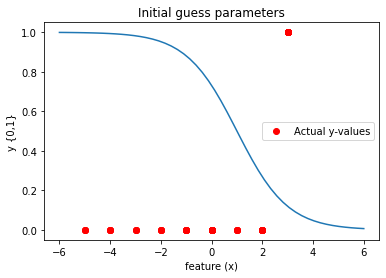

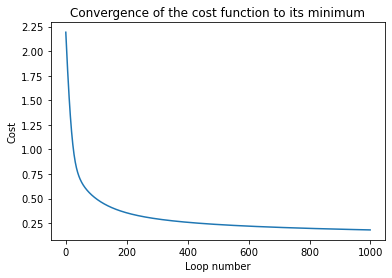

Final parameters are -2.577565770743336 for theta0 and 1.203648427265057 for theta1


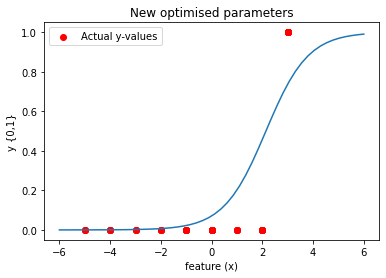

In [9]:
# Our features or input
X = df_grad['feat'].values
# Our target
y = df_grad['y-value'].values

# The parameters for our gradient descent (optimising our line of best fit)
alpha = 0.03
loops = 1000
th0 = 1
th1 = -1
print(f'Original parameters are {th0} for theta0 and {th1} for theta1')

z = np.linspace(-6, 6)
plt.plot(z, weighted_sigmoid(z, th1, th0))
plt.scatter(df_grad['feat'].values, df_grad['y-value'].values, c='r', label='Actual y-values')
plt.legend()
plt.xlabel('feature (x)')
plt.ylabel('y {0,1}')
plt.title('Initial guess parameters')
plt.show()

# The containers for tracking the gradient descents
cost_converge = []

for ii in range(1000):
    # The new values of th0 and th1 are stored in temporary variables so that 
    # each can be calculated with the same original th0 and th1
    temp_th0 = th0 - (alpha * pderiv_th0(X, y, alpha, th0, th1))
    temp_th1 = th1 - (alpha * pderiv_th1(X, y, alpha, th0, th1))
    th0 = temp_th0
    th1 = temp_th1
    cost_converge.append(cost_func(X, y, th0, th1))

plt.plot(cost_converge)
plt.title('Convergence of the cost function to its minimum')
plt.xlabel('Loop number')
plt.ylabel('Cost')
plt.show()
print(f'Final parameters are {th0} for theta0 and {th1} for theta1')

z = np.linspace(-6, 6)
plt.plot(z, weighted_sigmoid(z, th1, th0))
plt.scatter(df_grad['feat'].values, df_grad['y-value'].values, c='r', label='Actual y-values')
plt.legend()
plt.xlabel('feature (x)')
plt.ylabel('y {0,1}')
plt.title('New optimised parameters')
plt.show()

Our initial guess of the parameters (1 for $\theta_{0}$ and -1 for $\theta_{1}$) gives a sigmoidal shape which is a terrible fit for predicting out data. PLotting the cost, we see a very high initial cost which consistently decreases and begins to level out. Using the parameters at this stage (-2.6 for $\theta_{0}$ and 1.1 for $\theta_{1}$) we see a very good fit for the data.

In [10]:
# Calculating our hypothesis based on our feature, weight and bias
df_grad['hypothesis'] = 1/(1+np.exp(-(th0*df_grad['bias'] + th1*df_grad['feat'])))
df_grad['prediction'] = np.nan
# Converting our hypothesis values into predictions for y
df_grad.loc[df_grad['hypothesis'] < 0.5, 'prediction'] = 0
df_grad.loc[df_grad['hypothesis'] >= 0.5, 'prediction'] = 1

# Calculating the Pearson R value
correlation = df_grad['y-value'].corr(df_grad['prediction'])
print(df_grad.head())
print(f'Correlation between actual y-values and our prediction is {correlation}')

   bias  feat  y-value  hypothesis  prediction
0     1    -2      0.0    0.006794         0.0
1     1    -4      0.0    0.000616         0.0
2     1     2      0.0    0.457535         0.0
3     1    -1      0.0    0.022287         0.0
4     1    -4      0.0    0.000616         0.0
Correlation between actual y-values and our prediction is 0.9999999999999999


Our calculated parameters, plugged into the sigmoidal function gives us hypothesis values for each instance. If the hypothesis is 0.8, then there is an 80% chance that the y-value should fall into the 1 category. If the hypothesis gives a value of 0.1 for an instance then there is a 10% chance, and consequently a 90% chance that the y-value falls into the 0 category.

We then round our hypothesis value so that if hypothesis gives a value of 0.5 or higher, we assume a y-value of 1, and if hypothesis gives a value lower than 0.5, we assume a y-value of 0. This gives us a perfect correlation with the actual y-values. This was a relatively easy relationship to model as there was only one feature and the rule of 'if the feature is equal to or above 2, then y equals 1, if the deature is below 2, then y equals 0' was consistently adhered to.

If we have multiple features we can do the same process but in vector form. In this case the weights vector is made up of the weights for each feature with the bias included. The features are then taken as a matrix with one column of only ones which corresponds to the bias.
$$h_{\theta}(x) = \theta_{0}1 + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n}$$
The gradient descent is then
$$\theta' = \theta - \frac{\alpha}{m}X^{T}\Big (\frac{1}{1+e^{-X\theta}}-y\Big )$$
If n is the number of features, and i is the number of instances, our sigmoidal function will give us a $ix1$ matrix due to the multiplication of the $ixn$ X matrix and the $nx1$ $\theta$ matrix. When the y-values are minused from this we still have a $ix1$ matrix. We then multiply $X^{T}$ which is a $nxi$ matrix with our $ix1$ matrix to finally give a $nx1$ matrix for our new values of $\theta$. 

Final parameters are 1 for theta0 and -1 for theta1
Final parameters are -22.19350771132878 for theta0 and 9.019981988638456 for theta1


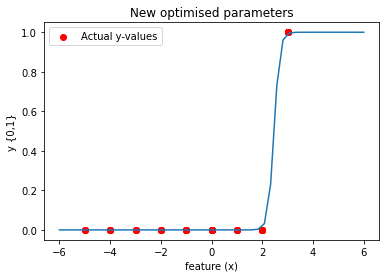

In [45]:
# This is the above function and updates each of the parameters simultaneously
def vector_update(X, y, theta, alpha):
    mm = len(y)
    return theta - ((alpha*mm)*np.matmul(np.transpose(X), (1/(1+np.exp(-np.matmul(X, theta))))-y))

# Obtaining our feature inputs (same as before)
X = df_grad[['bias', 'feat']].to_numpy()
y = df_grad['y-value'].values
# Our inital guess of the parameters, this time in vector form
theta = np.array([1,-1])
alpha = 0.003
print(f'Final parameters are {theta[0]} for theta0 and {theta[1]} for theta1')

for ii in range(1000):
    theta = vector_update(X, y, theta, alpha)
    
print(f'Final parameters are {theta[0]} for theta0 and {theta[1]} for theta1')

plt.plot(z, weighted_sigmoid(z, theta[1], theta[0]))
plt.scatter(df_grad['feat'].values, df_grad['y-value'].values, c='r', label='Actual y-values')
plt.legend()
plt.xlabel('feature (x)')
plt.ylabel('y {0,1}')
plt.title('New optimised parameters')
plt.show()

This very rapidly gives us very accurate parameters and can be extended to large numbers of features. All that happens is the $\theta$ vector grows for each new feature.